In [1]:
#ΟΝΟΜΑ : Χρήστος Τριανταφύλλου Αρχολέκας
#AM : 1115201700166

#ΟΝΟΜΑ : Ιωάννης Τζιεράκης
#ΑΜ : 1115201700163

#CREATE TRAIN.CSV AND DATAFRAME

import pandas as pd
import numpy as np
from tqdm import tqdm
import nltk 
from nltk.collocations import *
from nltk.metrics import (
    ContingencyMeasures,
    BigramAssocMeasures
)
from nltk.util import ngrams
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import re 
import os
import sys
import errno
import glob
import matplotlib.pyplot as plt
import folium as fm
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

path1 = r'C:\Users\pltzi\Desktop\data mining\PRJ2\fulltext\fulltext\data\business\*txt'
path2 = r'C:\Users\pltzi\Desktop\data mining\PRJ2\fulltext\fulltext\data\entertainment\*txt' 
path3 = r'C:\Users\pltzi\Desktop\data mining\PRJ2\fulltext\fulltext\data\politics\*txt'
path4 = r'C:\Users\pltzi\Desktop\data mining\PRJ2\fulltext\fulltext\data\sport\*txt'
path5 = r'C:\Users\pltzi\Desktop\data mining\PRJ2\fulltext\fulltext\data\tech\*txt'

column_names = ["id", "title", "content","category"]
train_df = pd.DataFrame(columns = column_names)
test_df = pd.DataFrame(columns = column_names)
id_sum = 0
# gkfhbdkfdknbklsnkfdklndskfdnl;gfkdnfndlsnfd;mfnd;ldnd
for i in range(5):
    titles = []
    contents = []
    if i == 0: 
        files1 = glob.glob(path1)
    elif i == 1 :
        files1 = glob.glob(path2)
    elif i == 2 :
        files1 = glob.glob(path3)
    elif i == 3 :
        files1 = glob.glob(path4)    
    elif i == 4 :
        files1 = glob.glob(path5)
    
    prc = 0
    for name in files1:
        x = -1
        prc += 1
        try:
            with open(name) as f:
                lines = []
                for line in f:
                    x += 1
                    if x!=0:
                        lines.append(line)
                    else:
                        titles.append(line)
                
                striga = str(lines)
                contents.append(striga)
            
            
                    
                 
               
        except IOError as exc:
            if exc.errno != errno.EISDIR:
                raise
    
    # column_names = ["id", "title", "content","category"]
    df = pd.DataFrame(columns = column_names)
    for p in range(len(files1)):
        df['id'] = np.arange(len(files1)) + id_sum
        
    id_sum += prc        
        
    k = 0    
    for j in titles:
        df['title'][k] = j
        k += 1   


    k = 0    
    for m in contents:
        df['content'][k] = m
        k += 1

    if i == 0: 
        df['category'] = 'business'
        df['category'].fillna('business', inplace = True)
    elif i == 1 :
        df['category'] = 'entertainment'
        df['category'].fillna('entertainment', inplace = True)
    elif i == 2 :
        df['category'] = 'politics'
        df['category'].fillna('politics', inplace = True)
    elif i == 3 :
        df['category'] = 'sport'
        df['category'].fillna('sport', inplace = True)    
    elif i == 4 :
        df['category'] = 'tech'
        df['category'].fillna('tech', inplace = True)   
    

    train_prc = prc*80/100
    train_df = train_df.append(df.head(int(train_prc)))
    test_prc = prc*20/100
    test_df = test_df.append(df.tail(int(test_prc)))
    
# train_df['content']=train_df['content'].str.replace('n','')    
# test_df['content']=test_df['content'].str.replace('n','')
train_df.to_csv("train_set.csv",index = False, header = True)
test_df.to_csv("test_set.csv",index = False, header = True)

C:\Users\pltzi\anaconda3\lib\site-packages\ipykernel_launcher.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\pltzi\anaconda3\lib\site-packages\ipykernel_launcher.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [2]:
#QUESTION 1

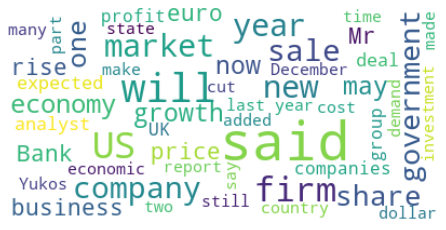

In [3]:
text = train_df['content'].loc[train_df['category'] == 'business'].values
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS ,max_font_size=50, max_words=50, background_color="white").generate(str(text))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

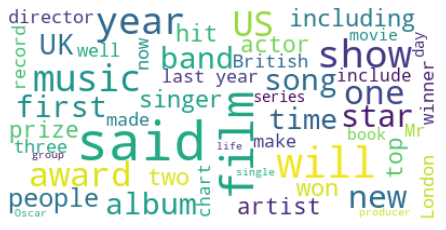

In [4]:
text = train_df['content'].loc[train_df['category'] == 'entertainment'].values
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS ,max_font_size=50, max_words=50, background_color="white").generate(str(text))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

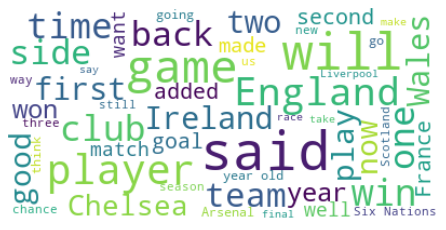

In [5]:
text = train_df['content'].loc[train_df['category'] == 'sport'].values
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS ,max_font_size=50, max_words=50, background_color="white").generate(str(text))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

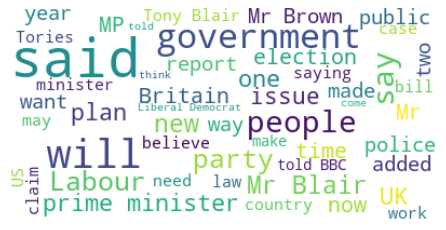

In [6]:
text = train_df['content'].loc[train_df['category'] == 'politics'].values
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS ,max_font_size=50, max_words=50, background_color="white").generate(str(text))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

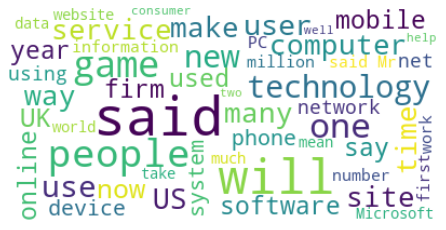

In [7]:
text = train_df['content'].loc[train_df['category'] == 'tech'].values
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS ,max_font_size=50, max_words=50, background_color="white").generate(str(text))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [8]:
#Question 2

In [10]:
# train_df['title'].value_counts().reshape(-1,1)
# test_df['title'].value_counts().reshape(-1,1)
Train_X,Test_X ,Train_Y, Test_Y = train_test_split(train_df['content'],train_df['title'],test_size=0.3)

#Create X array with vectorizer
# txt1 = train_df['content'].values
# txt2 = test_df['content'].values

# vectorizer = TfidfVectorizer(ngram_range = (1, 2),stop_words=STOPWORDS) 
# X = vectorizer.fit_transform(txt1)
# Y = vectorizer.fit_transform(txt2)
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(train_df['title'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)


svclassifier = SVC(kernel='linear')
svclassifier.fit(Train_X_Tfidf,Test_X_Tfidf)



ValueError: bad input shape ()